In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [2]:
data=pd.read_csv(r'C:\Users\asus 1\Desktop\Fliprobo\Machine learning projects\Rainfall prediction.csv')
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [3]:
data.shape

(8425, 23)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [5]:
data.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [6]:
data.describe()

MinTemp      MaxTemp     Rainfall  Evaporation     Sunshine  \
count  8350.000000  8365.000000  8185.000000  4913.000000  4431.000000   
mean     13.193305    23.859976     2.805913     5.389395     7.632205   
std       5.403596     6.136408    10.459379     5.044484     3.896235   
min      -2.000000     8.200000     0.000000     0.000000     0.000000   
25%       9.200000    19.300000     0.000000     2.600000     4.750000   
50%      13.300000    23.300000     0.000000     4.600000     8.700000   
75%      17.400000    28.000000     1.000000     7.000000    10.700000   
max      28.500000    45.500000   371.000000   145.000000    13.900000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count    7434.000000   8349.000000   8318.000000  8366.000000  8323.000000   
mean       40.174469     13.847646     18.533662    67.822496    51.249790   
std        14.665721     10.174579      9.766986    16.833283    18.423774   
min         7.000000      0.000000      0.000000    10.000000     6.000000   
25%        30.000000      6.000000     11.000000    56.000000    39.000000   
50%        39.000000     13.000000     19.000000    68.000000    51.000000   
75%        50.000000     20.000000     24.000000    80.000000    63.000000   
max       107.000000     63.000000     83.000000   100.000000    99.000000   

       Pressure9am  Pressure3pm     Cloud9am     Cloud3pm      Temp9am  \
count  7116.000000  7113.000000  6004.000000  5970.000000  8369.000000   
mean   1017.640233  1015.236075     4.566622     4.503183    17.762015   
std       6.828699     6.766681     2.877658     2.731659     5.627035   
min     989.800000   982.900000     0.000000     0.000000     1.900000   
25%    1013.000000  1010.400000     1.000000     2.000000    13.800000   
50%    1017.700000  1015.300000     5.000000     5.000000    17.800000   
75%    1022.300000  1019.800000     7.000000     7.000000    21.900000   
max    1039.000000  1036.000000     8.000000     8.000000    39.400000   

           Temp3pm  
count  8329.000000  
mean     22.442934  
std       5.980020  
min       7.300000  
25%      18.000000  
50%      21.900000  
75%      26.400000  
max      44.100000

In [7]:
missing_values=data.isnull().sum().sort_values(ascending=False)
percentage_missing_values=(missing_values/len(data))*100
print(pd.concat([missing_values, percentage_missing_values], axis=1, keys=['Missing Values', '% Missing values']))

               Missing Values  % Missing values
Sunshine                 3994         47.406528
Evaporation              3512         41.685460
Cloud3pm                 2455         29.139466
Cloud9am                 2421         28.735905
Pressure3pm              1312         15.572700
Pressure9am              1309         15.537092
WindGustDir               991         11.762611
WindGustSpeed             991         11.762611
WindDir9am                829          9.839763
WindDir3pm                308          3.655786
RainToday                 240          2.848665
Rainfall                  240          2.848665
RainTomorrow              239          2.836795
WindSpeed3pm              107          1.270030
Humidity3pm               102          1.210682
Temp3pm                    96          1.139466
WindSpeed9am               76          0.902077
MinTemp                    75          0.890208
MaxTemp                    60          0.712166
Humidity9am                59          0

In [8]:
data.drop(['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am', 'Date', 'Location'], axis=1, inplace=True)

In [9]:
data.isnull().sum()

MinTemp            75
MaxTemp            60
Rainfall          240
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [10]:
data['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [11]:
data['WindGustSpeed']=data['WindGustSpeed'].fillna(data['WindGustSpeed'].median())
data['Rainfall']=data['Rainfall'].fillna(data['Rainfall'].median())
data['Temp3pm'] = data['Temp3pm'].fillna(data['Temp3pm'].mean())
data['Humidity3pm'] = data['Humidity3pm'].fillna(data['Humidity3pm'].mean())

In [12]:
data.dropna(axis=0, inplace=True)

In [13]:
data.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [14]:
data.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6334 entries, 0 to 8423
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        6334 non-null   float64
 1   MaxTemp        6334 non-null   float64
 2   Rainfall       6334 non-null   float64
 3   WindGustDir    6334 non-null   object 
 4   WindGustSpeed  6334 non-null   float64
 5   WindDir9am     6334 non-null   object 
 6   WindDir3pm     6334 non-null   object 
 7   WindSpeed9am   6334 non-null   float64
 8   WindSpeed3pm   6334 non-null   float64
 9   Humidity9am    6334 non-null   float64
 10  Humidity3pm    6334 non-null   float64
 11  Pressure9am    6334 non-null   float64
 12  Pressure3pm    6334 non-null   float64
 13  Temp9am        6334 non-null   float64
 14  Temp3pm        6334 non-null   float64
 15  RainToday      6334 non-null   object 
 16  RainTomorrow   6334 non-null   object 
dtypes: float64(12), object(5)
memory usage: 890.7+ KB


In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['WindGustDir']=le.fit_transform(data['WindGustDir'])
data['WindDir9am']=le.fit_transform(data['WindDir9am'])
data['WindDir3pm']=le.fit_transform(data['WindDir3pm'])
data['RainToday']=le.fit_transform(data['RainToday'])
data['RainTomorrow']=le.fit_transform(data['RainTomorrow'])

In [17]:
columns=data.columns
columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

<AxesSubplot:>

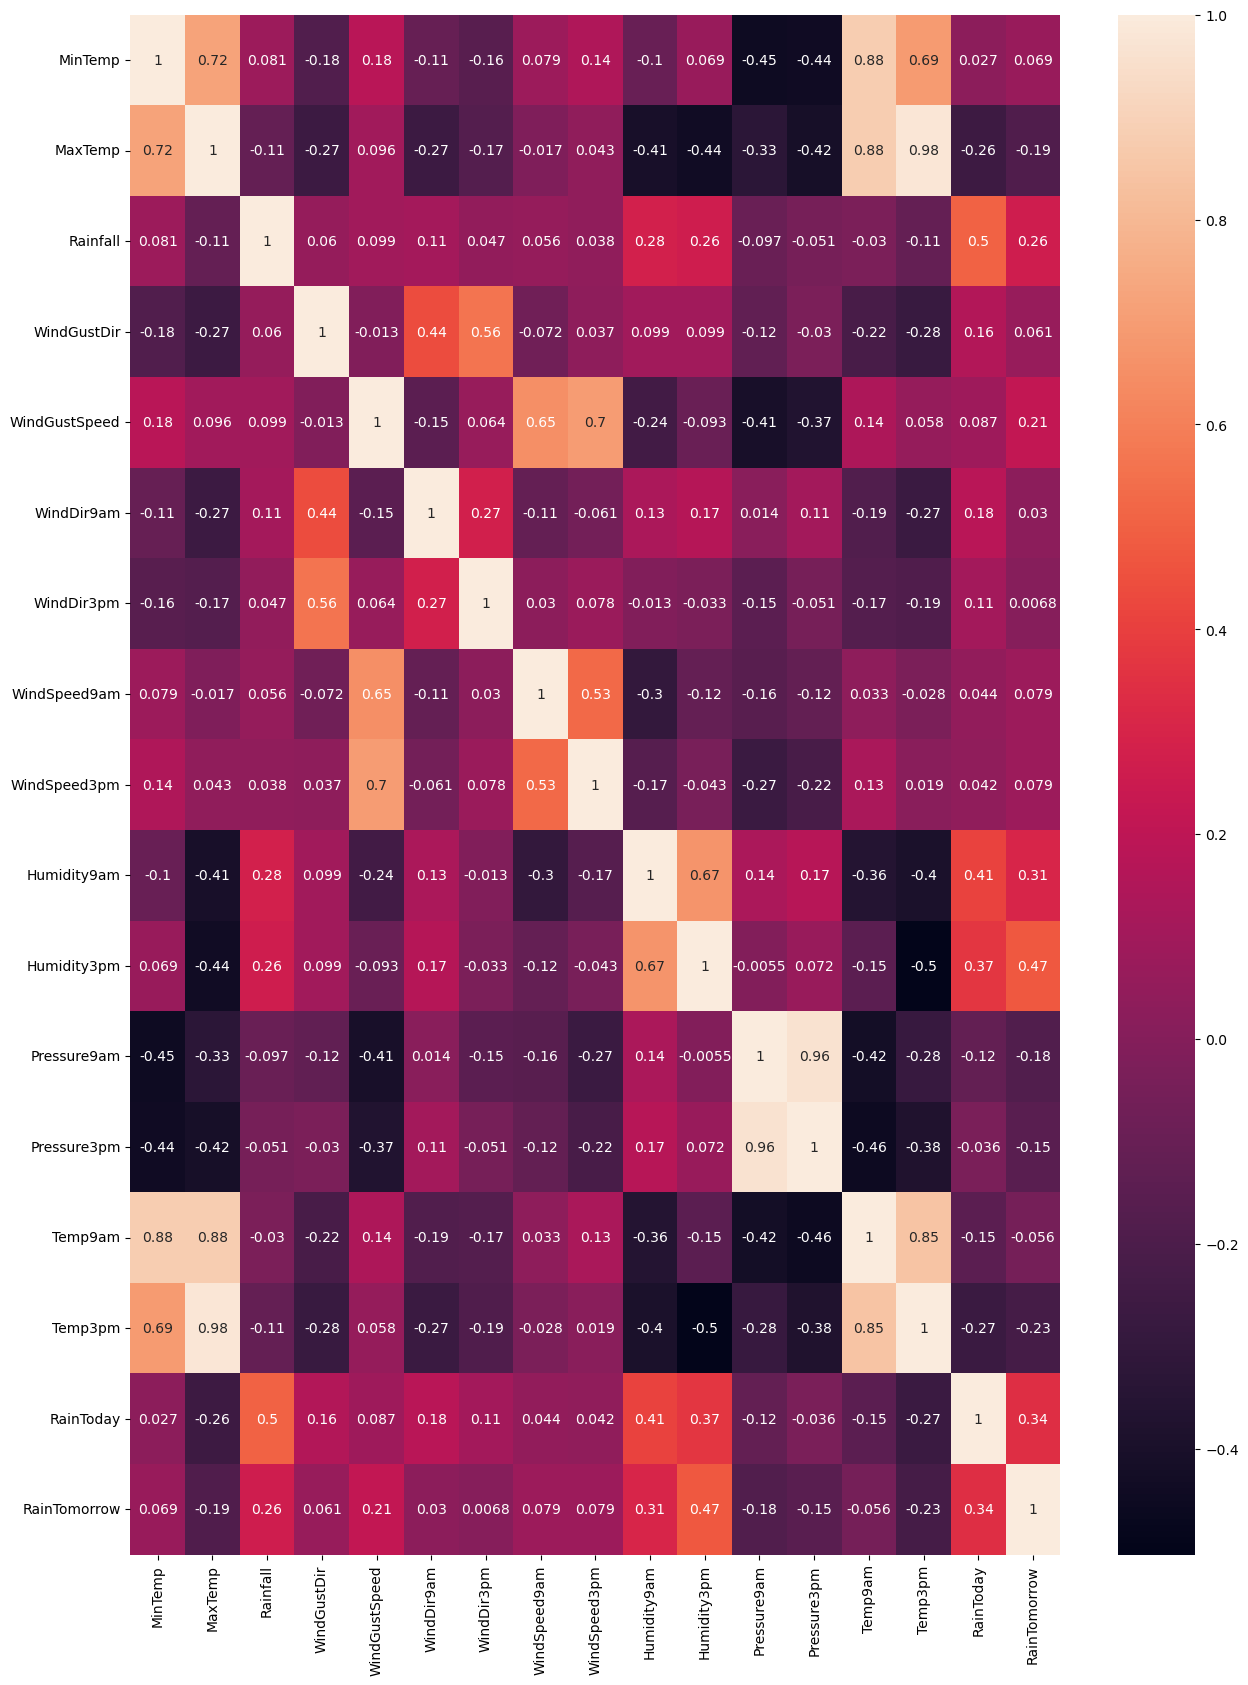

In [18]:
plt.figure(figsize=(15, 20))
sns.heatmap(data.corr(), annot=True)

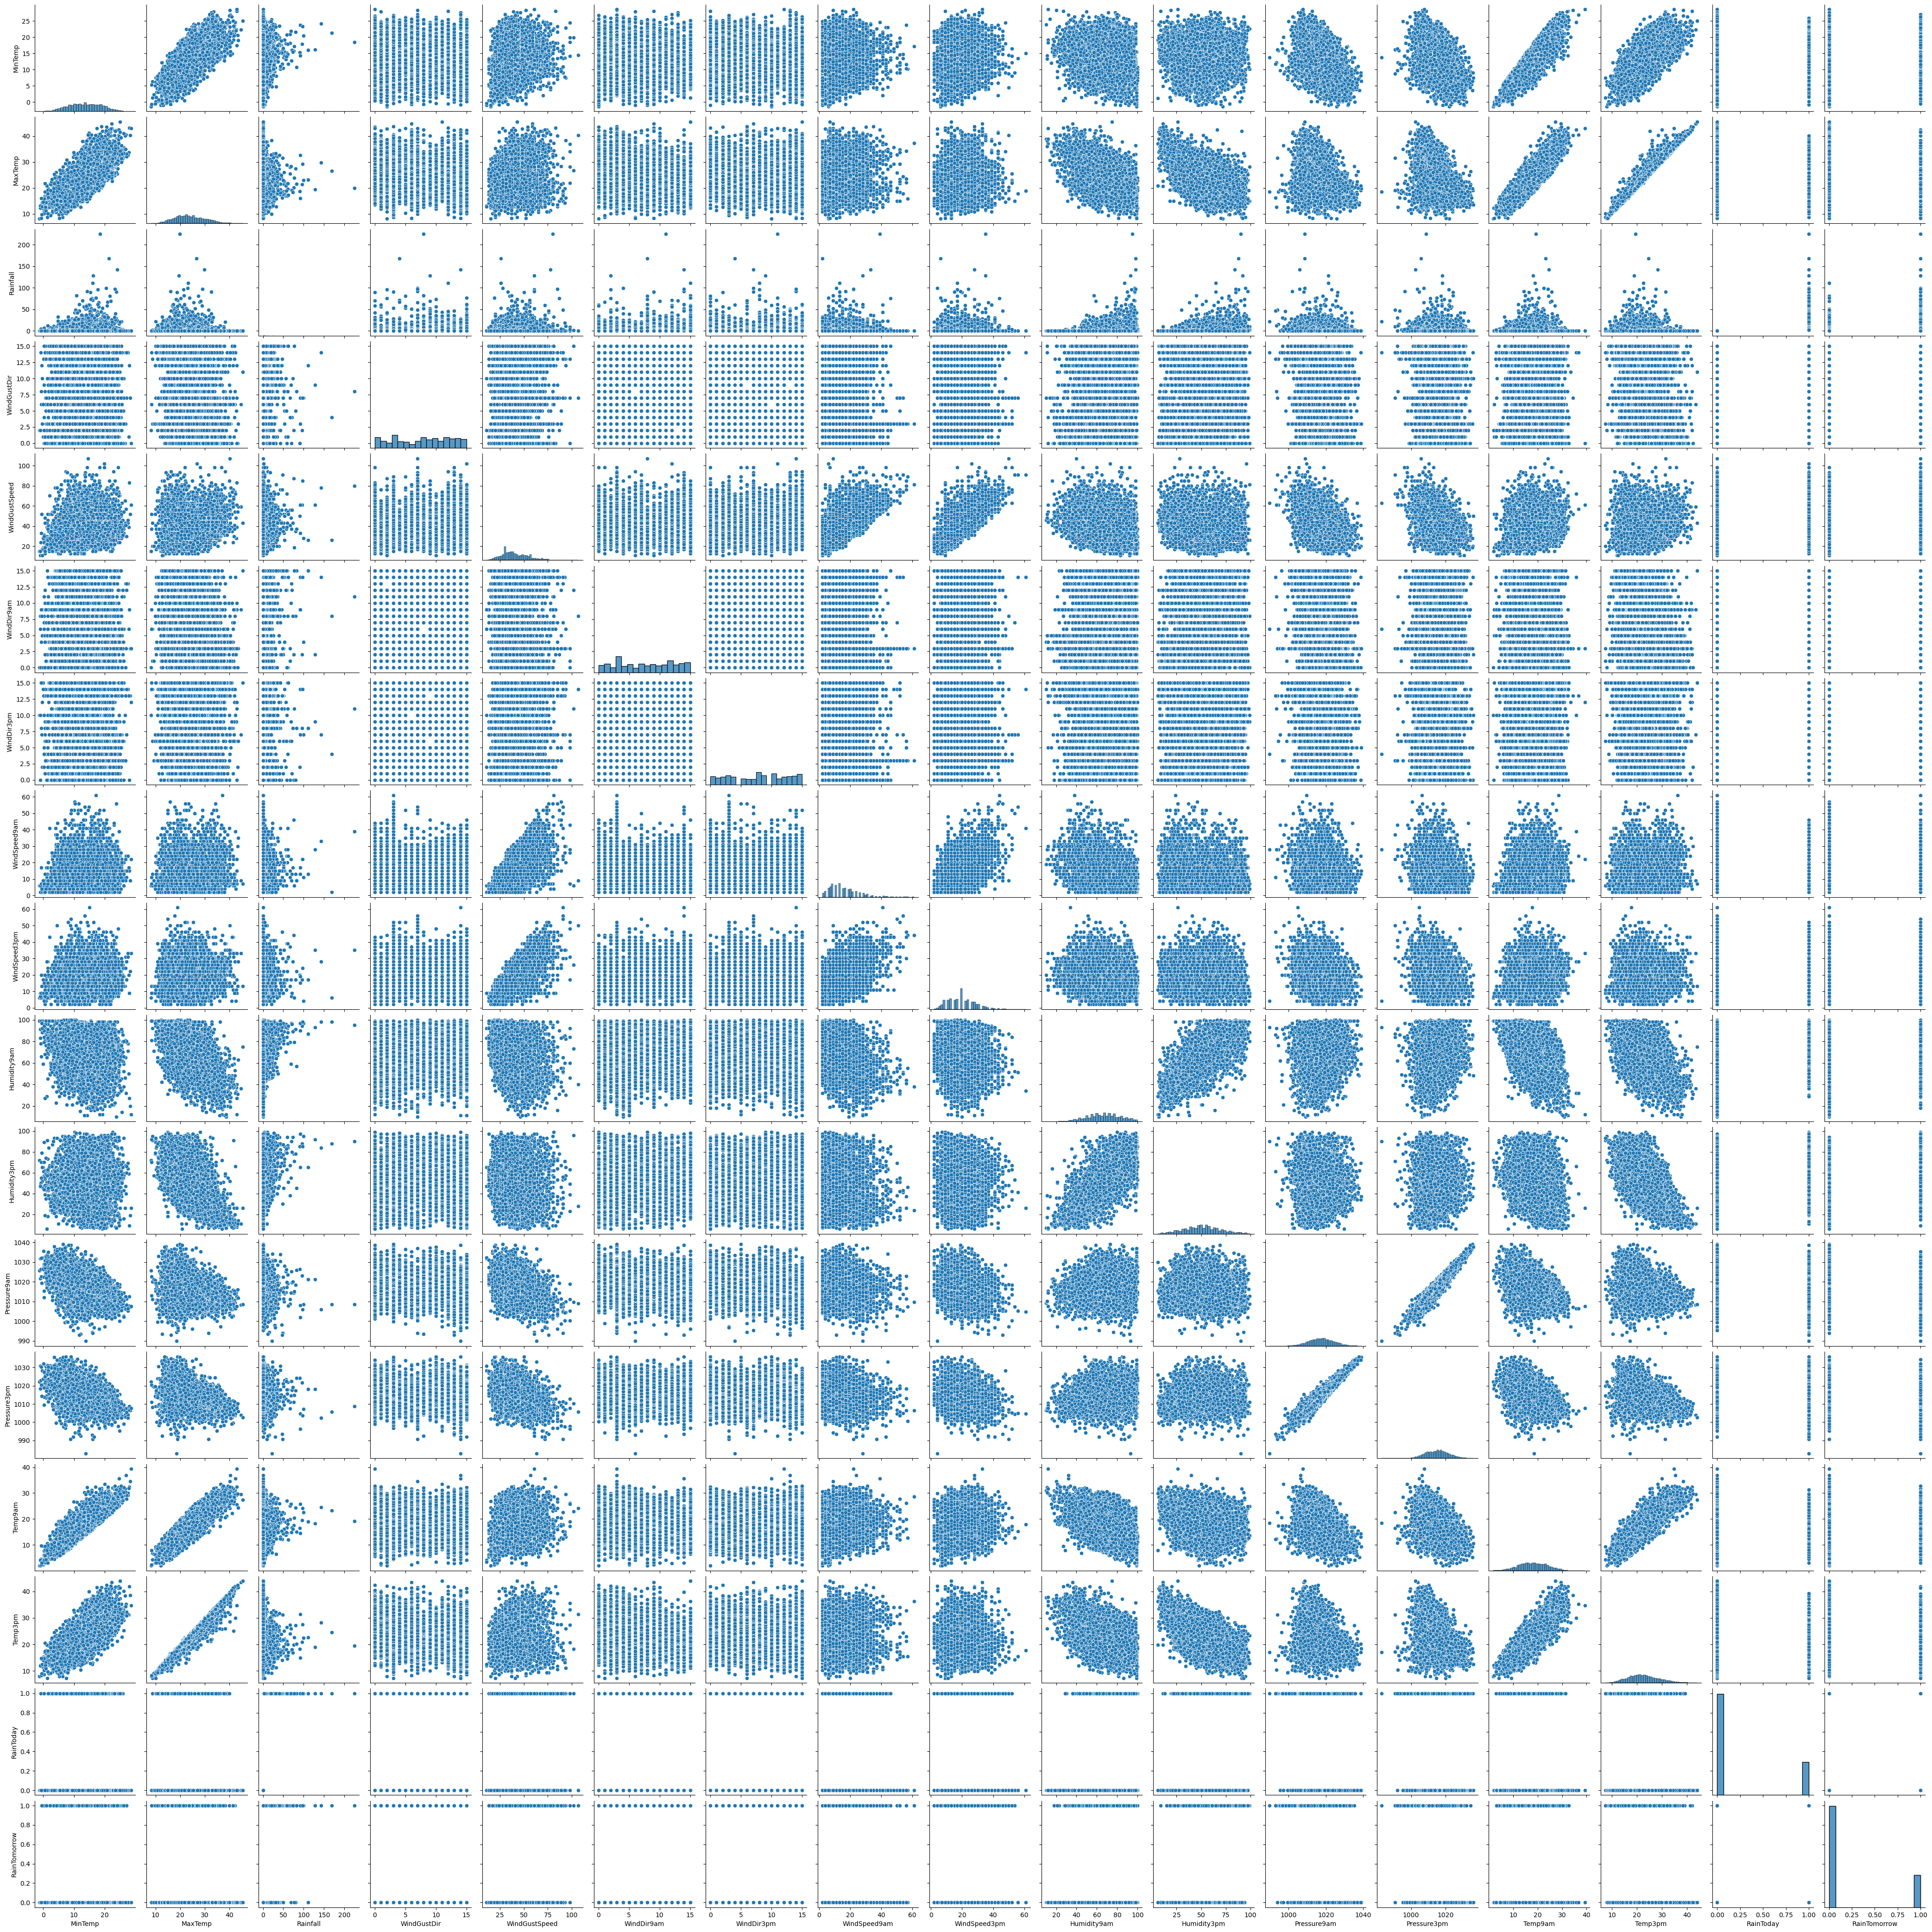

In [19]:
sns.pairplot(data=data)

# Model Building- Whether it will rain tomorrow

In [20]:
X=data.drop(['RainTomorrow'], axis=1)
y=data['RainTomorrow']

In [21]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=41)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5067, 16) (1267, 16) (5067,) (1267,)


In [22]:
y

0       0
1       0
2       0
3       0
4       0
       ..
8419    0
8420    0
8421    0
8422    0
8423    0
Name: RainTomorrow, Length: 6334, dtype: int32

In [23]:
max_accu=0
best_randomstate=0
for i in range(1,200):
    X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size = 0.2, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>max_accu:
        max_accu=acc
        best_randomstate=i
print(max_accu ,best_randomstate)

0.8602999210734017 64


In [24]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=64)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5067, 16) (1267, 16) (5067,) (1267,)


# Logistic Regression

In [25]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred=logreg.predict(X_test)
logreg_acc_score = accuracy_score(y_test, logreg_pred)
logreg_f1_score = f1_score(y_test, logreg_pred)
logreg_con_mat=confusion_matrix(y_test, logreg_pred)
logreg_cl_report=classification_report(y_test, logreg_pred)
print(logreg_acc_score )
print(logreg_f1_score )
print(logreg_con_mat)
print(logreg_cl_report)

0.8602999210734017
0.6424242424242425
[[931  44]
 [133 159]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       975
           1       0.78      0.54      0.64       292

    accuracy                           0.86      1267
   macro avg       0.83      0.75      0.78      1267
weighted avg       0.85      0.86      0.85      1267



In [26]:
logreg_cv_score = cross_val_score(logreg, X, y, cv =5)
logreg_mean_cv_score=logreg_cv_score.mean()
logreg_mean_cv_score

0.828547239377016

# Random Forest Classifier

In [27]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred=rfc.predict(X_test)
rfc_acc_score=accuracy_score(y_test, rfc_pred)
rfc_con_mat=confusion_matrix(y_test, rfc_pred)
rfc_cl_report=classification_report(y_test, rfc_pred)
rfc_cv_score = cross_val_score(rfc, X, y, cv =5)
rfc_f1_score = f1_score(y_test, rfc_pred)
rfc_mean_cv_score=rfc_cv_score.mean()
print(rfc_acc_score)
print(rfc_f1_score)
print(rfc_mean_cv_score)
print(rfc_con_mat)
print(rfc_cl_report)

0.9210734017363852
0.8091603053435115
0.8804809410344745
[[955  20]
 [ 80 212]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       975
           1       0.91      0.73      0.81       292

    accuracy                           0.92      1267
   macro avg       0.92      0.85      0.88      1267
weighted avg       0.92      0.92      0.92      1267



# Decision Tree Classifier

In [28]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_pred=dtc.predict(X_test)
dtc_acc_score = accuracy_score(y_test, dtc_pred)
dtc_con_mat=confusion_matrix(y_test, dtc_pred)
dtc_cl_report=classification_report(y_test, dtc_pred)
dtc_cv_score = cross_val_score(dtc, X, y, cv =5)
dtc_f1_score = f1_score(y_test, dtc_pred)
dtc_mean_cv_score=dtc_cv_score.mean()
print(dtc_acc_score)
print(dtc_f1_score)
print(dtc_mean_cv_score)
print(dtc_con_mat)
print(dtc_cl_report)

0.8808208366219415
0.7436332767402376
0.8046991874176289
[[897  78]
 [ 73 219]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       975
           1       0.74      0.75      0.74       292

    accuracy                           0.88      1267
   macro avg       0.83      0.83      0.83      1267
weighted avg       0.88      0.88      0.88      1267



# Gradient Boosting Classifier

In [29]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc_pred=gbc.predict(X_test)
gbc_acc_score = accuracy_score(y_test, gbc_pred)
gbc_con_mat=confusion_matrix(y_test, gbc_pred)
gbc_cl_report=classification_report(y_test, gbc_pred)
gbc_cv_score = cross_val_score(gbc, X, y, cv =5)
gbc_f1_score = f1_score(y_test, gbc_pred)
gbc_mean_cv_score=gbc_cv_score.mean()
print(gbc_acc_score)
print(gbc_f1_score)
print(gbc_mean_cv_score)
print(gbc_con_mat)
print(gbc_cl_report)

0.8721389108129439
0.6759999999999999
0.8323367135862227
[[936  39]
 [123 169]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       975
           1       0.81      0.58      0.68       292

    accuracy                           0.87      1267
   macro avg       0.85      0.77      0.80      1267
weighted avg       0.87      0.87      0.86      1267



# Gaussian Naive Bayes Classifier

In [30]:
gnb=GaussianNB()
gnb.fit(X_train, y_train)
gnb_pred=gnb.predict(X_test)
gnb_acc_score = accuracy_score(y_test, gnb_pred)
gnb_con_mat=confusion_matrix(y_test, gnb_pred)
gnb_cl_report=classification_report(y_test, gnb_pred)
gnb_cv_score = cross_val_score(gnb, X, y, cv =5)
gnb_f1_score = f1_score(y_test, gnb_pred)
gnb_mean_cv_score=gnb_cv_score.mean()
print(gnb_acc_score)
print(gnb_f1_score)
print(gnb_mean_cv_score)
print(gnb_con_mat)
print(gnb_cl_report)

0.8176795580110497
0.5911504424778761
0.7971345779546665
[[869 106]
 [125 167]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       975
           1       0.61      0.57      0.59       292

    accuracy                           0.82      1267
   macro avg       0.74      0.73      0.74      1267
weighted avg       0.81      0.82      0.82      1267



# Support Vector Classifier

In [31]:
svm=SVC()
svm.fit(X_train, y_train)
svm_pred=svm.predict(X_test)
svm_acc_score = accuracy_score(y_test, svm_pred)
svm_con_mat=confusion_matrix(y_test, svm_pred)
svm_cl_report=classification_report(y_test, svm_pred)
svm_cv_score = cross_val_score(svm, X, y, cv =5)
svm_f1_score = f1_score(y_test, svm_pred)
svm_mean_cv_score=svm_cv_score.mean()
print(svm_acc_score)
print(svm_f1_score)
print(svm_mean_cv_score)
print(svm_con_mat)
print(svm_cl_report)

0.7703235990528808
0.006825938566552901
0.7586043084197099
[[975   0]
 [291   1]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       975
           1       1.00      0.00      0.01       292

    accuracy                           0.77      1267
   macro avg       0.89      0.50      0.44      1267
weighted avg       0.82      0.77      0.67      1267



# Stochastic Gradient Descent

In [32]:
sgd=SGDClassifier()
sgd.fit(X_train, y_train)
sgd_pred=sgd.predict(X_test)
sgd_acc_score = accuracy_score(y_test, sgd_pred)
sgd_con_mat=confusion_matrix(y_test, sgd_pred)
sgd_cl_report=classification_report(y_test, sgd_pred)
sgd_cv_score = cross_val_score(sgd, X, y, cv =5)
sgd_f1_score = f1_score(y_test, sgd_pred)
sgd_mean_cv_score=sgd_cv_score.mean()
print(sgd_acc_score)
print(sgd_f1_score)
print(sgd_mean_cv_score)
print(sgd_con_mat)
print(sgd_cl_report)

0.7663772691397001
0.6281407035175879
0.7792885633738191
[[721 254]
 [ 42 250]]
              precision    recall  f1-score   support

           0       0.94      0.74      0.83       975
           1       0.50      0.86      0.63       292

    accuracy                           0.77      1267
   macro avg       0.72      0.80      0.73      1267
weighted avg       0.84      0.77      0.78      1267



# Ada Boost Classifier

In [33]:
adc=AdaBoostClassifier()
adc.fit(X_train, y_train)
adc_pred=adc.predict(X_test)
adc_acc_score = accuracy_score(y_test, adc_pred)
adc_con_mat=confusion_matrix(y_test, adc_pred)
adc_cl_report=classification_report(y_test, adc_pred)
adc_cv_score = cross_val_score(adc, X, y, cv =5)
adc_f1_score = f1_score(y_test, adc_pred)
adc_mean_cv_score=adc_cv_score.mean()
print(adc_acc_score)
print(adc_f1_score)
print(adc_mean_cv_score)
print(adc_con_mat)
print(adc_cl_report)

0.850828729281768
0.6301369863013698
0.82128649108304
[[917  58]
 [131 161]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       975
           1       0.74      0.55      0.63       292

    accuracy                           0.85      1267
   macro avg       0.81      0.75      0.77      1267
weighted avg       0.84      0.85      0.84      1267



In [34]:
model_pf=pd.DataFrame({'Models':['Logistic Regression', 'Random Forest Classifier', 'Decision Tree', 'Gradient Boosting Classifier', 'Gaussian Naive Bayes Classifier', 'Support Vector Classifier', 'Stochastic Gradient Descent', 'AdaBoost Classifier'], 'Accuracy Score' : [logreg_acc_score, rfc_acc_score,  dtc_acc_score, gbc_acc_score, gnb_acc_score, svm_acc_score, sgd_acc_score, adc_acc_score], 'CV Score' : [logreg_mean_cv_score, rfc_mean_cv_score,  dtc_mean_cv_score, gbc_mean_cv_score, gnb_mean_cv_score, svm_mean_cv_score, sgd_mean_cv_score, adc_mean_cv_score]})
model_pf

Models  Accuracy Score  CV Score
0              Logistic Regression        0.860300  0.828547
1         Random Forest Classifier        0.921073  0.880481
2                    Decision Tree        0.880821  0.804699
3     Gradient Boosting Classifier        0.872139  0.832337
4  Gaussian Naive Bayes Classifier        0.817680  0.797135
5        Support Vector Classifier        0.770324  0.758604
6      Stochastic Gradient Descent        0.766377  0.779289
7              AdaBoost Classifier        0.850829  0.821286

In [35]:
#Decision tre is the best model for predicting whether it will rain tomorrow or not

# Model Building-Rainfall prediction

In [36]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [38]:
X1 = data.drop(['Rainfall'], axis=1)
y1 = data['Rainfall']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
print(X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape)

(5067, 16) (1267, 16) (5067,) (1267,)


In [41]:
maxr2_score1=0
best_random_state1=0
for i in range(1,200):
    X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, random_state=i, test_size=.2)
    lin_reg=LinearRegression()
    lin_reg.fit(X1_train,y1_train)
    y1_pred=lin_reg.predict(X1_test)
    R2_1=r2_score(y1_test,y1_pred)
    if R2_1>maxr2_score1:
        maxr2_score1=R2_1
        best_random_state1=i
print('Best R2 Score is', maxr2_score1 ,'on Random_state', best_random_state1)

Best R2 Score is 0.3945674204650067 on Random_state 26


In [43]:
X1_train, X1_test, y1_train, y1_test=train_test_split(X1, y1, test_size=0.2, random_state=26)

In [49]:
linreg=LinearRegression()
linreg.fit(X1_train, y1_train)
lr_pred = linreg.predict(X1_test)
lr_score=r2_score(y1_test, lr_pred)
lr_mse=mean_squared_error(y1_test, lr_pred )
lr_rmse=lr_mse**0.5
print(lr_score, lr_mse, lr_rmse)

0.3945674204650067 25.350319797733025 5.034910108207795


In [45]:
rfc=RandomForestRegressor()
rfc.fit(X1_train, y1_train)
rfc_pred = rfc.predict(X1_test)
rfc_score=r2_score(y1_test, rfc_pred)
rfc_mse=mean_squared_error(y1_test, rfc_pred )
rfc_rmse=rfc_mse**0.5
print(rfc_score, rfc_mse, rfc_rmse)

0.30322557845436826 29.174932123125494 5.401382427038979


In [46]:
dtr=DecisionTreeRegressor()
dtr.fit(X1_train, y1_train)
dtr_pred = dtr.predict(X1_test)
dtr_score=r2_score(y1_test, dtr_pred)
dtr_mse=mean_squared_error(y1_test, dtr_pred )
dtr_rmse=dtr_mse**0.5
print(dtr_score, dtr_mse, dtr_rmse)

-0.554856043776059 65.10402525651145 8.068706541727208


In [47]:
dtr=DecisionTreeRegressor()
dtr.fit(X1_train, y1_train)
dtr_pred = dtr.predict(X1_test)
dtr_score=r2_score(y1_test, dtr_pred)
dtr_mse=mean_squared_error(y1_test, dtr_pred )
dtr_rmse=dtr_mse**0.5
print(dtr_score, dtr_mse, dtr_rmse)

-0.5391289384505507 64.44550907655879 8.027796028584607


In [48]:
abr=AdaBoostRegressor()
abr.fit(X1_train, y1_train)
abr_pred = abr.predict(X1_test)
abr_score=r2_score(y1_test, abr_pred)
abr_mse=mean_squared_error(y1_test, abr_pred )
abr_rmse=abr_mse**0.5
print(abr_score, abr_mse, abr_rmse)

-4.727332825302724 239.81153908333087 15.485849640343629


In [52]:
xgb=XGBRegressor()
xgb.fit(X1_train, y1_train)
xgb_pred = xgb.predict(X1_test)
xgb_score=r2_score(y1_test, xgb_pred)
xgb_mse=mean_squared_error(y1_test, xgb_pred )
xgb_rmse=xgb_mse**0.5
print(xgb_score, xgb_mse, xgb_rmse)

0.3094948755067356 28.912427774075493 5.377027782527769


In [54]:
model_rainfall=pd.DataFrame({'Model':['Linear regression', 'Random forest', 'Decision Tree', 'Ada Boost', 'XGB'], 'R2_Score':[lr_score, rfc_score, dtr_score, abr_score, xgb_score], 'Root mean squared error':[lr_rmse, rfc_rmse, dtr_rmse, abr_rmse, xgb_rmse]})
model_rainfall

Model  R2_Score  Root mean squared error
0  Linear regression  0.394567                 5.034910
1      Random forest  0.303226                 5.401382
2      Decision Tree -0.539129                 8.027796
3          Ada Boost -4.727333                15.485850
4                XGB  0.309495                 5.377028

In [ ]:
#Linear Regression is the best model for predicting rainfall